## Project Overview
- Your goal for this project is to fetch all securties in each index that propose a gain today. 
- Not only will you fetch these you will sort the returns as wells a find the securites that are of penny value (we wil lconsider all stocks under 5 dollars a penny stock
- In the current status of economy and Covid 19 one may wonder what a perfect portfolio would look like. Find and optimize a poortfolio that would have generated a satisfying return during the Covid 19 pandemic

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from pandas_datareader import data as web

/Users/berkatbhatti/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


### Nasdaq
- Importing tickers for the Nasdaq
- 103 companies listed

In [2]:
nasdaq = pd.read_excel("resources/nasdaq_100_stocks.xlsx")

In [3]:
nasdaq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ticker             103 non-null    object 
 1   Name               103 non-null    object 
 2   Price              103 non-null    float64
 3   Dividend Yield     56 non-null     float64
 4   Market Cap ($M)    102 non-null    float64
 5   Forward P/E Ratio  102 non-null    float64
 6   Payout Ratio       56 non-null     float64
 7   Beta               102 non-null    float64
dtypes: float64(6), object(2)
memory usage: 6.6+ KB


### Visualizations
 - There is one company with a dividend yield above 5% and a few 4% and above 
 - lets find these companies

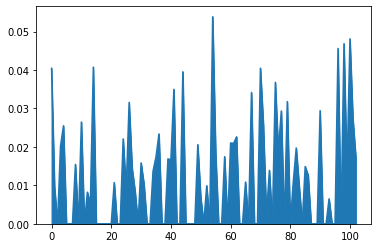

In [4]:
nasdaq["Dividend Yield"].plot(kind = "area")

In [5]:
nasdaq.set_index("Ticker")[["Dividend Yield", "Name"]].sort_values("Dividend Yield",ascending = False).head(10)

,Dividend Yield,Name
Ticker,,
KHC,0.053854,The Kraft Heinz Co.
WYNN,0.048106,Wynn Resorts Ltd.
WDC,0.046849,Western Digital Corp.
WBA,0.045597,"Walgreens Boots Alliance, Inc."
AVGO,0.040757,"Broadcom, Inc."
NTAP,0.040466,"NetApp, Inc."
AAL,0.040445,"American Airlines Group, Inc."
HAS,0.039535,"Hasbro, Inc."
PAYX,0.036795,"Paychex, Inc."


### Below are the top 10 Dividend  Yielding companies in the Nasdaq

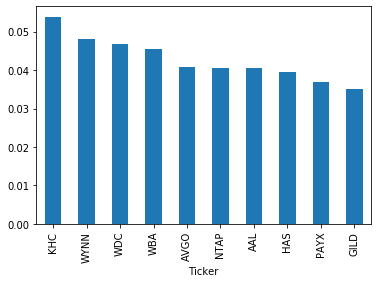

In [6]:
nasdaq.set_index("Ticker")["Dividend Yield"].sort_values(ascending = False).head(10).plot(kind = "bar")

### Fetch Adjustable close for all securities in the nasdaq
- Will fetch this form the yahoo finance library 

In [7]:
nasd_tickers = list(nasdaq["Ticker"])

In [8]:
nasdaq_adj_Close = pd.DataFrame()

In [9]:
passed = []
failed = []
for x in nasd_tickers:
    try:
        nasdaq_adj_Close[x] = web.DataReader(x, data_source="yahoo", start = "2020-1-1")["Adj Close"]
        passed.append(x)
    except(IOError, KeyError):
        failed.append(x)

### Checking for missing Data
- Will drop if Null,but appear there is no data missing below

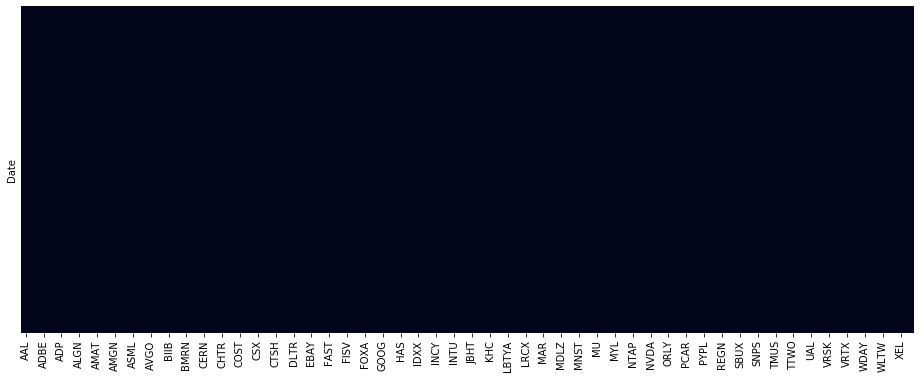

In [10]:
plt.figure(figsize=(16,6))
sns.heatmap(nasdaq_adj_Close.isnull(), yticklabels=False, cbar=False)

## Checking Coorelation 

In [11]:
nasdaq_adj_Close.corr()

,AAL,AAPL,ADBE,ADI,ADP,ADSK,ALGN,ALXN,AMAT,AMD,...,VRSK,VRSN,VRTX,WBA,WDAY,WDC,WLTW,WYNN,XEL,XLNX
AAL,1.000000,-0.166385,-0.240908,0.308914,0.885763,-0.041161,0.252665,0.127410,0.410811,-0.264423,...,-0.017321,0.131671,-0.543315,0.859020,0.285403,0.918718,0.399886,0.921794,0.242979,0.034004
AAPL,-0.166385,1.000000,0.955116,0.641552,-0.090870,0.863732,0.809588,0.463194,0.668750,0.917712,...,0.907861,0.428231,0.553926,-0.471813,0.796545,-0.307336,0.539291,-0.043289,0.653026,0.817983
ADBE,-0.240908,0.955116,1.000000,0.700493,-0.096304,0.929849,0.792884,0.553881,0.664704,0.833187,...,0.898717,0.469544,0.703134,-0.544364,0.820506,-0.337066,0.545623,-0.113842,0.586190,0.794840
ADI,0.308914,0.641552,0.700493,1.000000,0.510893,0.860805,0.864938,0.821597,0.889532,0.453390,...,0.762772,0.724764,0.517374,0.035163,0.842405,0.287525,0.775601,0.485242,0.572453,0.784657
ADP,0.885763,-0.090870,-0.096304,0.510893,1.000000,0.140881,0.369706,0.366707,0.568286,-0.236293,...,0.154882,0.426686,-0.223187,0.743923,0.412435,0.927132,0.595573,0.909992,0.365875,0.151841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WDC,0.918718,-0.307336,-0.337066,0.287525,0.927132,-0.114759,0.173835,0.176190,0.382843,-0.387298,...,-0.075929,0.256596,-0.437701,0.843743,0.206309,1.000000,0.449943,0.910854,0.160317,-0.015248
WLTW,0.399886,0.539291,0.545623,0.775601,0.595573,0.664324,0.802396,0.598493,0.842799,0.413807,...,0.734768,0.720750,0.369480,0.111277,0.798788,0.449943,1.000000,0.565346,0.650557,0.643005
WYNN,0.921794,-0.043289,-0.113842,0.485242,0.909992,0.088202,0.396917,0.344215,0.534809,-0.142742,...,0.116241,0.387490,-0.348056,0.764236,0.412769,0.910854,0.565346,1.000000,0.281033,0.199422
XEL,0.242979,0.653026,0.586190,0.572453,0.365875,0.619526,0.680871,0.334491,0.722563,0.644440,...,0.797489,0.453247,0.218869,-0.003547,0.658277,0.160317,0.650557,0.281033,1.000000,0.588689


## Checking returns for each Security 
- we will look the most recent date(Todays Data) 

In [12]:
todays_date = nasdaq_adj_Close.iloc[-1:].iloc[0].name

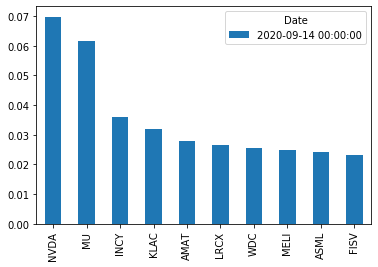

In [23]:
nasdaq_adj_Close.pct_change().iloc[-1:].transpose().sort_values(todays_date, ascending = False).head(10).plot(kind = "bar")

Text(0, 0.5, 'Returns')

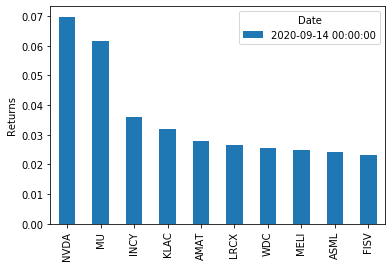

In [14]:
nasdaq_adj_Close.pct_change().iloc[-1:].transpose().sort_values(todays_date, ascending = False).head(10).plot(kind = "bar")
plt.ylabel("Returns")

## Nasdaq Volatility 
- Lets look at the volatility of each security year to date

In [15]:
nas_returns = nasdaq_adj_Close.pct_change()

In [16]:
nas_returns

,AAL,AAPL,ADBE,ADI,ADP,ADSK,ALGN,ALXN,AMAT,AMD,...,VRSK,VRSN,VRTX,WBA,WDAY,WDC,WLTW,WYNN,XEL,XLNX
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.049502,-0.009722,-0.007834,-0.017604,-0.002114,-0.015333,-0.011421,-0.013260,-0.015916,-0.010183,...,0.009727,0.021095,-0.006699,0.000000,0.005852,-0.015392,0.000245,-0.014833,0.004809,-0.023020
2020-01-06,-0.011935,0.007968,0.005726,-0.011749,0.001353,0.011733,0.019398,0.001598,-0.021565,-0.004321,...,0.002294,0.009259,0.027755,0.008632,0.006234,-0.019192,0.001223,-0.001979,-0.001436,-0.020844
2020-01-07,-0.003660,-0.004703,-0.000959,0.022751,-0.012104,0.002031,-0.009864,0.002533,0.028886,-0.002893,...,0.008369,0.002318,-0.001071,-0.005034,0.020414,0.067698,-0.002053,0.004745,-0.002077,0.022830
2020-01-08,0.022777,0.016086,0.013438,0.009032,0.009398,0.013067,0.010386,0.016191,-0.000649,-0.008705,...,0.009207,0.004626,0.032620,-0.058357,0.033304,0.014484,0.001127,0.006274,-0.000961,-0.002815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-08,0.001470,-0.067295,-0.060597,-0.038403,-0.019057,-0.040705,0.000712,-0.042312,-0.087434,-0.040483,...,-0.025606,-0.033065,-0.029606,-0.021415,-0.033457,-0.044811,-0.025428,-0.057456,-0.012996,-0.038863
2020-09-09,-0.042553,0.039887,0.037500,0.022403,0.010082,0.037529,0.047539,0.000832,-0.007730,0.040920,...,0.027346,0.017885,0.017130,-0.020776,0.010404,0.002743,0.029833,0.003266,0.021415,0.027638
2020-09-10,-0.003065,-0.032646,-0.006674,-0.010307,-0.032637,-0.019675,0.012441,-0.020964,-0.001449,-0.035771,...,-0.007980,-0.011631,-0.028095,-0.019236,-0.016323,-0.008208,-0.009178,0.004581,-0.020683,-0.015838


In [17]:
nasdaq_vol = []
for x in nas_returns.columns:
    nasdaq_vol.append(nas_returns[f"{x}"].std() * 252)

In [18]:
nasdaq_vol_df = pd.DataFrame(nasdaq_vol, columns=["volatility"], index=nas_returns.columns)

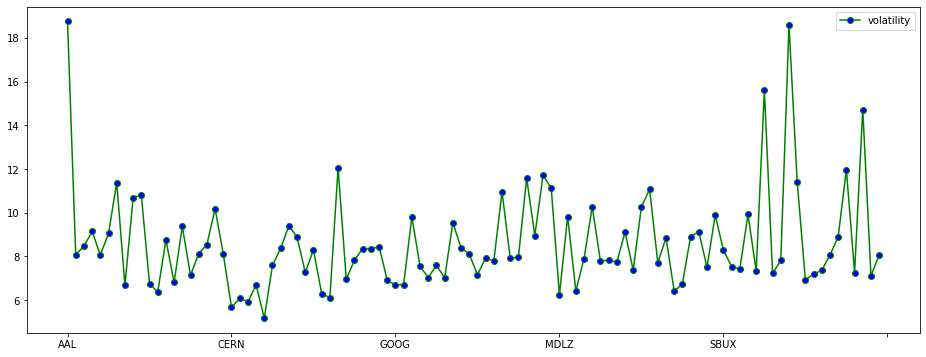

In [19]:
nasdaq_vol_df.plot(figsize = (16,6), c ="g", marker = "o", mfc = "b")

## Sorting Volatility for Nasdaq
- top 10 mose volatile companies in the nasdaq year to date

In [20]:
nasdaq_vol_df.sort_values("volatility", ascending = False).head(10)

,volatility
AAL,18.751965
UAL,18.586453
TSLA,15.608224
WYNN,14.721754
EXPE,12.051170
WDC,11.968138
MAR,11.719772
LRCX,11.575379
ULTA,11.414168
ALGN,11.374528


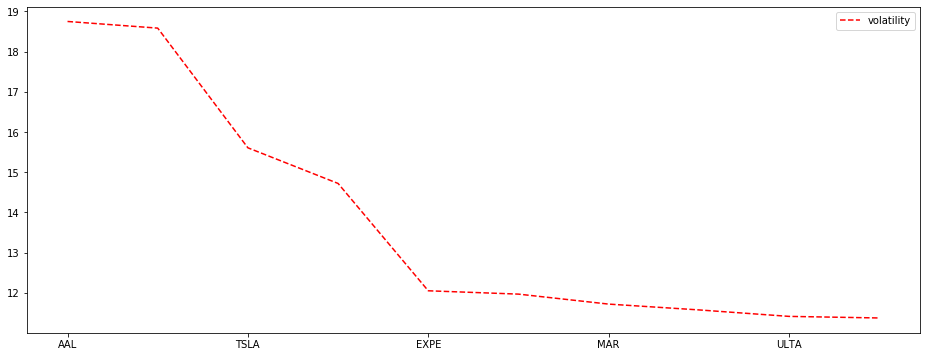

In [21]:
nasdaq_vol_df.sort_values("volatility", ascending = False).head(10).plot(figsize = (16,6), 
                                                                          kind = "line", ls = "--", c= "r" )

### Creating an Optimized Portfolio for Nasdaq
- We are considering Covid 19 and the portfolio that would have yielded the highest return considering risk. 
- THe optimized portfolio should consist of 10 companies
- Creating an efficient frontier using every company in the nasdaq
- This will proivde us with the top weighted companies year today where we will than take the top 10 weighted companies
- Will create 1000 portfolios to get the portfolio containing every company

In [80]:
n_portfolios = 1000
all_weights = np.zeros((n_portfolios, len(passed)))
all_Sharps = np.zeros(n_portfolios)
all_vol = np.zeros(n_portfolios)
all_returns = np.zeros(n_portfolios)

for ind in range(n_portfolios):
    weights = np.array(np.random.random(len(passed)))
    weights = weights/weights.sum()
    all_weights[ind,:] = weights
    
    all_returns[ind] = np.sum(nas_returns.mean() * weights * 252)
    all_vol[ind] = np.sqrt(np.dot(weights.T, np.dot(nas_returns.cov() * 252, weights)))
    all_Sharps[ind] = all_returns[ind]/all_vol[ind]

### Evaluating the portfolio
- Max sharp
- Max returns
- min vol
- again we are fetching the max return(focus) for a portfolio containing 10 companies in 2020

In [81]:
max_sharp = all_Sharps.argmax()

In [82]:
max_returns = all_returns.argmax()

In [83]:
lowest_vol = all_vol.argmin()

### Plot on a scatter plot for visualization
- As you can see the maximum returns for a portfolio containing every company in the Nasdaq would yield avolatility of approzimately 40% and this is non the less not fesiable and unrealistic
- Below we will find the to companies that make up the portfolio relative to weight that produces the max Return

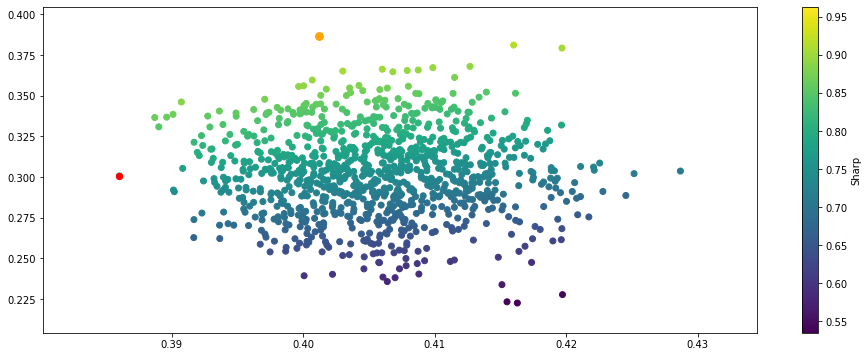

In [84]:
plt.figure(figsize=(16,6))
plt.scatter(all_vol, all_returns, c=all_Sharps)
plt.colorbar(label = "Sharp")
plt.scatter(all_vol[max_sharp], all_returns[max_sharp], c="red", s = 40)
plt.scatter(all_vol[lowest_vol], all_returns[lowest_vol], c="red", s = 40)
plt.scatter(all_vol[max_returns], all_returns[max_returns], c="orange", s = 60)

## Creating Frontier Data frame from created portfolio
- Will use this to get the max return portfolio by weight 
- Will than sort the weights of the max return portfolio to grab the to 10 compaines

In [85]:
frontier_returns = pd.DataFrame(all_returns, columns=["returns"])

In [86]:
frontier_weights = pd.DataFrame(all_weights, columns=passed)

In [87]:
frontier_vol = pd.DataFrame(all_vol, columns=["Vol"])

In [88]:
frontier_sharp = pd.DataFrame(all_Sharps, columns=["Sharp"])

In [89]:
frontier = pd.concat([frontier_returns, frontier_sharp, frontier_vol, frontier_weights], axis=1)

In [90]:
frontier

,returns,Sharp,Vol,AAL,AAPL,ADBE,ADI,ADP,ADSK,ALGN,...,VRSK,VRSN,VRTX,WBA,WDAY,WDC,WLTW,WYNN,XEL,XLNX
0,0.279969,0.681284,0.410943,0.001615,0.003163,0.008276,0.014718,0.016053,0.016786,0.014820,...,0.001081,0.004018,0.019065,0.003576,0.011472,0.003510,0.012199,0.016205,0.013009,0.013067
1,0.285681,0.694259,0.411491,0.009396,0.018267,0.011044,0.002012,0.015167,0.011036,0.011968,...,0.016097,0.003088,0.016121,0.000144,0.017116,0.007225,0.001308,0.017548,0.010308,0.006218
2,0.305354,0.757792,0.402953,0.008998,0.003658,0.014228,0.013381,0.001346,0.004303,0.019132,...,0.018155,0.006951,0.010002,0.015530,0.015959,0.016819,0.002014,0.001387,0.013190,0.006799
3,0.289520,0.728283,0.397538,0.017372,0.010841,0.016040,0.001004,0.019574,0.019986,0.016901,...,0.021098,0.001097,0.005604,0.019244,0.002422,0.012701,0.013147,0.008033,0.002121,0.009808
4,0.310995,0.783719,0.396819,0.002627,0.015308,0.009075,0.009424,0.017400,0.009145,0.017530,...,0.006538,0.009748,0.011772,0.013920,0.008662,0.014327,0.016067,0.002779,0.014517,0.018657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.272092,0.667466,0.407650,0.013446,0.007973,0.000284,0.011453,0.014090,0.003507,0.001975,...,0.001225,0.016996,0.002757,0.019337,0.008621,0.011762,0.007283,0.013231,0.007539,0.002345
996,0.254402,0.622429,0.408724,0.015718,0.011461,0.002687,0.002240,0.016679,0.017631,0.012475,...,0.009803,0.013207,0.017052,0.012336,0.017066,0.015475,0.005072,0.014600,0.011218,0.009363
997,0.285381,0.716154,0.398491,0.007479,0.017728,0.001099,0.006671,0.015770,0.000467,0.016429,...,0.018396,0.012389,0.009358,0.016175,0.015718,0.015649,0.017029,0.018162,0.015367,0.006673
998,0.288496,0.705174,0.409113,0.004453,0.001296,0.009755,0.010712,0.001972,0.000724,0.006488,...,0.011967,0.013382,0.000313,0.003343,0.011636,0.005568,0.003438,0.001060,0.013061,0.019274


### Finding max return portfolio
- Maximum return for the portfolio containing every company in the Nasdaq is 44%
- We wil ltake the top 10 companies in the portfolio

In [91]:
frontier[frontier["returns"] == frontier["returns"].max()]

,returns,Sharp,Vol,AAL,AAPL,ADBE,ADI,ADP,ADSK,ALGN,...,VRSK,VRSN,VRTX,WBA,WDAY,WDC,WLTW,WYNN,XEL,XLNX
465,0.386467,0.963369,0.401162,0.010352,0.016231,0.007261,0.000596,0.019396,0.014531,0.008149,...,0.001327,0.002627,0.014354,0.001148,0.00648,0.012265,0.021615,0.006336,0.004301,0.003747


## Top 10 companies in portfolio
- we will make a portfolio out of these companies to see what is the maximum return we could have received

In [92]:
frontier[frontier["returns"] == frontier["returns"].max()].transpose().drop(["returns"
                                                    ,"Sharp", "Vol"])

,465
AAL,0.010352
AAPL,0.016231
ADBE,0.007261
ADI,0.000596
ADP,0.019396
...,...
WDC,0.012265
WLTW,0.021615
WYNN,0.006336
XEL,0.004301


In [96]:
top10 = frontier[frontier["returns"] == frontier["returns"].max()].transpose().drop(["returns"
                                                    ,"Sharp", "Vol"]).sort_values(465, ascending = False).head(10)

In [97]:
top10

,465
WLTW,0.021615
CSCO,0.021534
SWKS,0.021492
MNST,0.020557
TXN,0.020546
REGN,0.020018
JD,0.019808
TMUS,0.019518
SNPS,0.019497
COST,0.019416


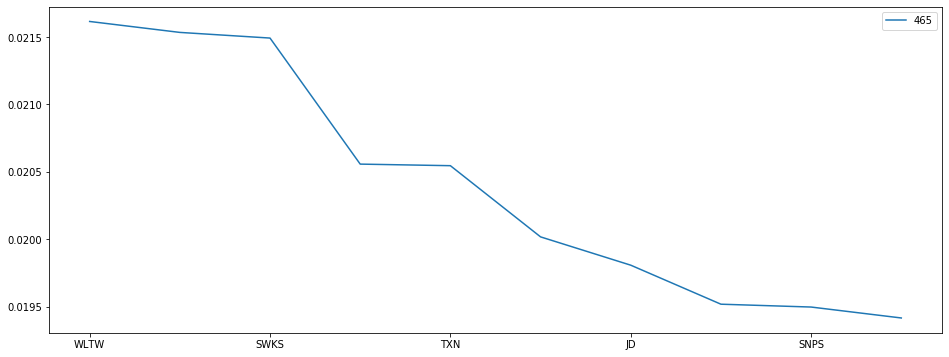

In [98]:
top10.plot(figsize = (16,6))

In [99]:
top10_tickers = list(top10.index)

In [100]:
top_10_returns = nas_returns[top10_tickers]

In [101]:
top_10_returns

,WLTW,CSCO,SWKS,MNST,TXN,REGN,JD,TMUS,SNPS,COST
Date,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,0.000245,-0.016316,-0.024821,-0.006593,-0.013275,-0.011223,0.006891,-0.005344,-0.007769,0.000823
2020-01-06,0.001223,0.003569,-0.017615,0.001580,-0.006961,0.006989,0.000263,0.005757,0.001552,0.000274
2020-01-07,-0.002053,-0.006485,0.009523,0.004891,0.019297,0.003739,0.008421,0.003816,0.006902,-0.001576
2020-01-08,0.001127,0.000632,0.015892,0.002041,0.002705,0.024898,-0.000522,0.006336,0.020285,0.011464
...,...,...,...,...,...,...,...,...,...,...
2020-08-31,-0.000632,0.000474,0.008564,-0.008044,-0.009339,0.028742,-0.016508,0.003613,0.008246,-0.002038
2020-09-01,0.013818,-0.004500,0.011115,0.011686,0.019768,-0.043957,0.048957,0.001886,0.018256,0.010700
2020-09-02,0.037433,0.009279,0.046634,0.019920,0.018488,0.029476,0.008728,0.016938,0.017840,0.021287


In [102]:
n_port = 2000
all_w = np.zeros((n_port, len(top10_tickers)))
all_s = np.zeros(n_port)
all_v = np.zeros(n_port)
all_r = np.zeros(n_port)

for index in range(n_port):
    weii = np.array(np.random.random(len(top10_tickers)))
    weii = weii/weii.sum()
    all_w[index,:] = weii
    
    all_r[index] = np.sum(top_10_returns.mean() * weii * 252)
    all_v[index] = np.sqrt(np.dot(weii.T, np.dot(top_10_returns.cov() * 252, weii)))
    all_s[index] = all_r[index]/all_v[index]

### Analysis of portfolio
- Max Ret
- Max Sharp 
- Lowest Vol 
- Targeting Highest Return

In [103]:
max_ret = all_r.argmax()

In [104]:
max_shp = all_s.argmax()

In [105]:
lowest_v = all_v.argmin()

Text(0.5, 1.0, 'Nasdaq Portfolio Optimized for Maximum Return- \n 10 compaines by weight')

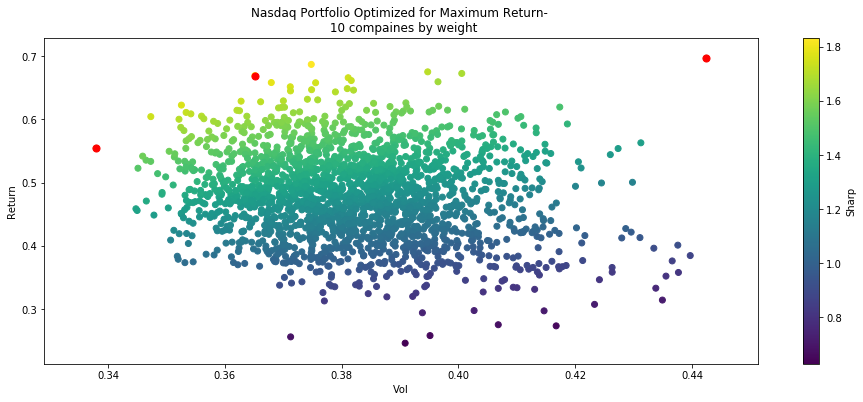

In [106]:
plt.figure(figsize=(16,6))
plt.scatter(all_v, all_r, c = all_s)
plt.colorbar(label = "Sharp")
plt.scatter(all_v[max_ret], all_r[max_ret], c = "r", s = 50)
plt.scatter(all_v[lowest_v], all_r[lowest_v], c = "r", s = 50)
plt.scatter(all_v[max_shp], all_r[max_shp], c = "r", s = 50)
plt.ylabel("Return")
plt.xlabel("Vol")
plt.title("Nasdaq Portfolio Optimized for Maximum Return- \n 10 compaines by weight")

In [107]:
top_weights = pd.DataFrame(all_w, columns=top10_tickers)   

In [108]:
top_retruns = pd.DataFrame(all_r, columns=["returns"])

In [109]:
top_vol = pd.DataFrame(all_v, columns=["vol"])

In [110]:
top_sharp= pd.DataFrame(all_s, columns=["shp"])

In [111]:
top_frontier = pd.concat([top_retruns,top_sharp, top_vol, top_weights], axis=1)

In [112]:
top_frontier

,returns,shp,vol,WLTW,CSCO,SWKS,MNST,TXN,REGN,JD,TMUS,SNPS,COST
0,0.429776,1.036858,0.414498,0.223223,0.072216,0.216116,0.142229,0.007134,0.026025,0.039518,0.133951,0.136773,0.002817
1,0.496855,1.247448,0.398297,0.134940,0.009712,0.173586,0.010868,0.176024,0.015591,0.167337,0.049909,0.056333,0.205700
2,0.354201,0.936363,0.378273,0.173639,0.065883,0.070973,0.151494,0.188248,0.028367,0.005096,0.150378,0.017689,0.148233
3,0.410483,1.036703,0.395951,0.022910,0.124246,0.150541,0.152589,0.177322,0.106188,0.036697,0.081764,0.038789,0.108953
4,0.397151,0.993714,0.399664,0.019352,0.199903,0.074020,0.042715,0.135724,0.039856,0.005297,0.210951,0.188913,0.083269
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.460117,1.174480,0.391763,0.024045,0.159559,0.118596,0.111237,0.078974,0.095767,0.056857,0.114690,0.164032,0.076245
1996,0.445899,1.226119,0.363667,0.125492,0.131648,0.092583,0.176206,0.003461,0.182527,0.057711,0.005063,0.105478,0.119831
1997,0.452732,1.218993,0.371399,0.150762,0.141684,0.076595,0.075671,0.053772,0.160771,0.067710,0.102354,0.106934,0.063747
1998,0.513600,1.289927,0.398162,0.076648,0.074830,0.182671,0.089046,0.047601,0.148853,0.061952,0.055554,0.204522,0.058322


## Max return Portfolio by weight

In [113]:
top_frontier[top_frontier["returns"] == all_r.max()]

,returns,shp,vol,WLTW,CSCO,SWKS,MNST,TXN,REGN,JD,TMUS,SNPS,COST
906,0.696705,1.574649,0.442451,0.06564,0.039288,0.271182,0.004338,0.022647,0.027416,0.321839,0.004892,0.210869,0.031888


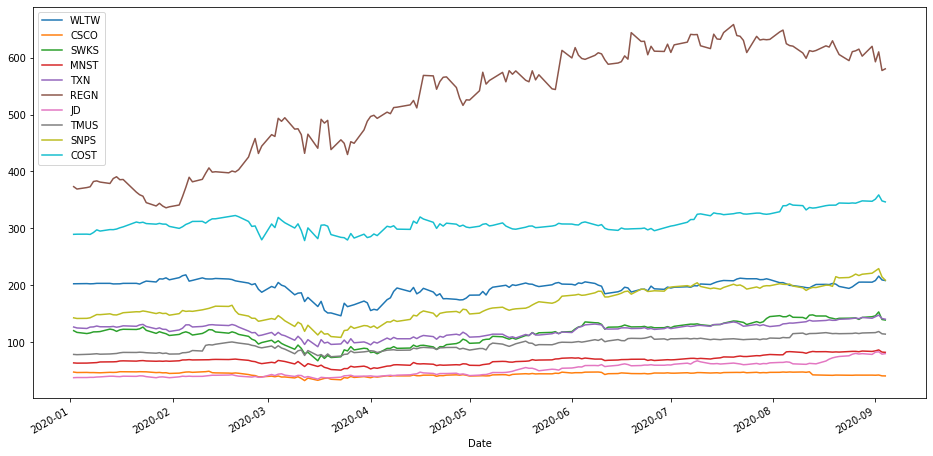

In [114]:
nasdaq_adj_Close[top10_tickers].plot(figsize = (16,8))

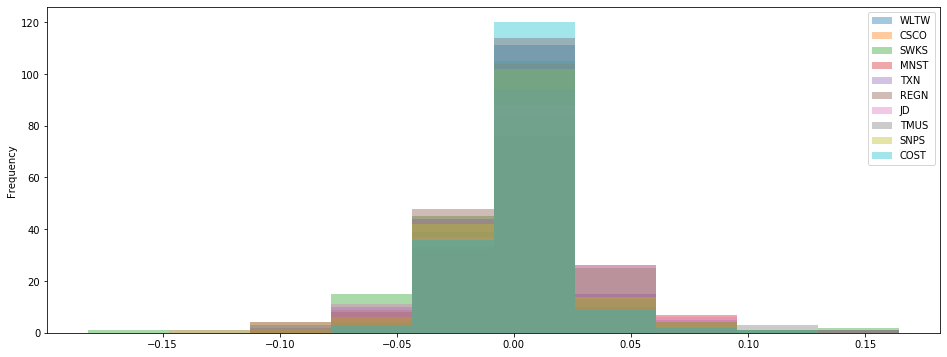

In [115]:
nas_returns[top10_tickers].plot(figsize =(16,6), kind = "hist",alpha = 0.4)

## Below we will take a look at precovid